In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
ds = pd.read_csv("admission_pred.csv")
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


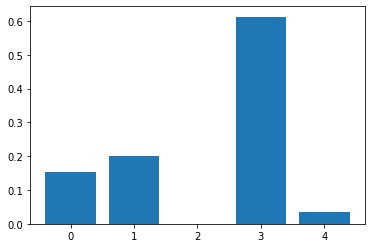

In [3]:
ds=ds.rename(columns = {'Chance of Admit ':'Chance of Admit'})
ds.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [4]:
ds['Chance of Admit'] = np.where(ds['Chance of Admit']>0.5,1,0)
ds.drop(['Serial No.'],axis=1,inplace=True)
ds.drop(['SOP'],axis=1,inplace=True)
ds.drop(['LOR '],axis=1,inplace=True)
ds.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit
0,337,118,4,9.65,1,1
1,324,107,4,8.87,1,1
2,316,104,3,8.00,1,1
3,322,110,3,8.67,1,1
4,314,103,2,8.21,0,1


In [5]:
y = ds['Chance of Admit'].values
X = ds.iloc[:,:5]

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.35,shuffle = False)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std_train = sc.fit_transform(X_train)
X_std_test = sc.fit_transform(X_test)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=4)
dt.fit(X_std_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [9]:
y_pred_dt = dt.predict(X_std_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_dt,y_test))

0.9314285714285714


In [10]:
from sklearn.ensemble import BaggingClassifier

num_trees = 100
bc = BaggingClassifier(base_estimator=dt,n_estimators=num_trees,random_state=10)
result = cross_val_score(bc,X_std,y,cv=10)
print(*result)

0.9215686274509803 0.92 0.92 0.94 0.92 0.96 0.94 0.88 0.92 1.0


In [11]:
from statistics import mean

print("%.4f"%(mean(result)))

0.9322


In [12]:
ans = dt.predict_proba([[265,8.42,100,4,1]])
print(ans)

[[0. 1.]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_std_train,y_train)
    yhat=neigh.predict(X_std_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93142857, 0.90857143, 0.91428571, 0.91428571, 0.91428571,
       0.91428571, 0.91428571, 0.91428571, 0.91428571])

In [14]:
print( "The best accuracy was with", mean_acc.max(), "with k =",mean_acc.argmax()+1)

The best accuracy was with 0.9314285714285714 with k = 1


In [15]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_std_train,y_train)

y_pred_knn = knn.predict(X_std_test)

In [16]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_std_train, y_train) 

y_pred_svm = svm_model.predict(X_std_test)
acc_score = metrics.accuracy_score(y_test,y_pred_svm)
print(acc_score)

0.9142857142857143


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
LR.fit(X_std_train,y_train)

y_pred_LR = LR.predict(X_std_test)
print(accuracy_score(y_pred_LR,y_test))

C:\Users\P.Janani\Ananconda64bit\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9257142857142857


In [18]:
"""import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, out_file=None, 
                      feature_names=X.columns,  
                      class_names=["eligible","not-eligible"],  
                      filled=True, rounded=True,  
                      special_characters=True)  

tree = graphviz.Source(dot_data)
tree.render("dt",view=True)
file = open("C:\\Users\\P.Janani\\Desktop\\treeimage.txt","w+")
file.write(dot_data)
file.close()

tree"""

'import graphviz\nfrom sklearn.tree import export_graphviz\n\ndot_data = export_graphviz(dt, out_file=None, \n                      feature_names=X.columns,  \n                      class_names=["eligible","not-eligible"],  \n                      filled=True, rounded=True,  \n                      special_characters=True)  \n\ntree = graphviz.Source(dot_data)\ntree.render("dt",view=True)\nfile = open("C:\\Users\\P.Janani\\Desktop\\treeimage.txt","w+")\nfile.write(dot_data)\nfile.close()\n\ntree'

In [19]:
"""import matplotlib.pyplot as plt

df=pd.DataFrame({'features':X.columns,'importances':dt.feature_importances_})
df=df.sort_values(by='importances',ascending=False)
plt.bar(df.features, df.importances)
plt.xticks(np.arange(len(df.features)),df.features)
plt.ylabel('Importances')
plt.title('Features Importances')
plt.show()"""

"import matplotlib.pyplot as plt\n\ndf=pd.DataFrame({'features':X.columns,'importances':dt.feature_importances_})\ndf=df.sort_values(by='importances',ascending=False)\nplt.bar(df.features, df.importances)\nplt.xticks(np.arange(len(df.features)),df.features)\nplt.ylabel('Importances')\nplt.title('Features Importances')\nplt.show()"

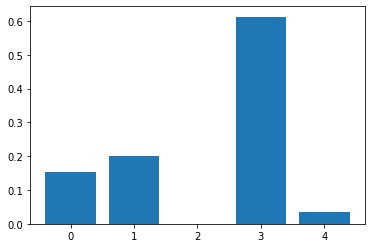

In [20]:
import matplotlib.pyplot as plt

importance = dt.feature_importances_
plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [21]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

In [ ]:
import matplotlib.pyplot as plt

x = ["KNN","SVM","Logistic_Reg","Decision_Tree","Bagging"]
y = np.array([accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_svm),accuracy_score(y_test, y_pred_LR),accuracy_score(y_test,y_pred_dt),mean(cross_val_score(bc,X_std,y,cv=5))])
plt.barh(x,y, color='#225b46')
plt.xlabel("Accuracy Score")
plt.ylabel("Classification Models")
plt.title("Best Accuracy Score")
plt.grid(alpha=0.5)
plt.show()